### Предобработка данных

In [1]:
import pandas as pd
data = pd.read_csv('heart_disease/heart_disease_uci.csv', sep=',')
print(data)

      id  age     sex         origin               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thal

In [2]:
display(data.head())

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   origin    920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


None

In [4]:
display(data.describe().round())

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.0,920.0,861.0,890.0,865.0,858.0,309.0,920.0
mean,460.0,54.0,132.0,199.0,138.0,1.0,1.0,1.0
std,266.0,9.0,19.0,111.0,26.0,1.0,1.0,1.0
min,1.0,28.0,0.0,0.0,60.0,-3.0,0.0,0.0
25%,231.0,47.0,120.0,175.0,120.0,0.0,0.0,0.0
50%,460.0,54.0,130.0,223.0,140.0,0.0,0.0,1.0
75%,690.0,60.0,140.0,268.0,157.0,2.0,1.0,2.0
max,920.0,77.0,200.0,603.0,202.0,6.0,3.0,4.0


In [12]:
'data['sex'] = data['sex'].apply(lambda x: '1.0' if x=='Male' else '0.0')
data

SyntaxError: invalid syntax (3737680456.py, line 1)

In [6]:
from os.path import join 
from sklearn.neighbors import (KNeighborsRegressor, KNeighborsClassifier) 
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error, accuracy_score) 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, LabelEncoder)  
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from PIL import Image

In [9]:
le = LabelEncoder()
data['cp'] = le.fit_transform(data['cp'])
data['restecg'] = le.fit_transform(data['restecg'])
data['slope'] = le.fit_transform(data['slope'])
data.head()

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1.0,Cleveland,3,145.0,233.0,True,0,150.0,False,2.3,0,0.0,fixed defect,0
1,2,67,1.0,Cleveland,0,160.0,286.0,False,0,108.0,True,1.5,1,3.0,normal,2
2,3,67,1.0,Cleveland,0,120.0,229.0,False,0,129.0,True,2.6,1,2.0,reversable defect,1
3,4,37,1.0,Cleveland,2,130.0,250.0,False,1,187.0,False,3.5,0,0.0,normal,0
4,5,41,0.0,Cleveland,1,130.0,204.0,False,0,172.0,False,1.4,2,0.0,normal,0


In [10]:
data.isnull().sum()


id            0
age           0
sex           0
origin        0
cp            0
trestbps     59
chol         30
fbs          90
restecg       0
thalch       55
exang        55
oldpeak      62
slope         0
ca          611
thal        486
num           0
dtype: int64

In [13]:
# Учитывая большое количество пропущенных значений, решено удалить бины slope, thal
data.drop(columns=['slope', 'thal'], inplace=True)

In [14]:
data.head()

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,num
0,1,63,0.0,Cleveland,3,145.0,233.0,True,0,150.0,False,2.3,0.0,0
1,2,67,0.0,Cleveland,0,160.0,286.0,False,0,108.0,True,1.5,3.0,2
2,3,67,0.0,Cleveland,0,120.0,229.0,False,0,129.0,True,2.6,2.0,1
3,4,37,0.0,Cleveland,2,130.0,250.0,False,1,187.0,False,3.5,0.0,0
4,5,41,0.0,Cleveland,1,130.0,204.0,False,0,172.0,False,1.4,0.0,0


In [15]:
! pip install seaborn
import seaborn as sns

You should consider upgrading via the 'C:\Users\Acer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [16]:
! pip install matplotlib
import matplotlib.pyplot as plt

You should consider upgrading via the 'C:\Users\Acer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


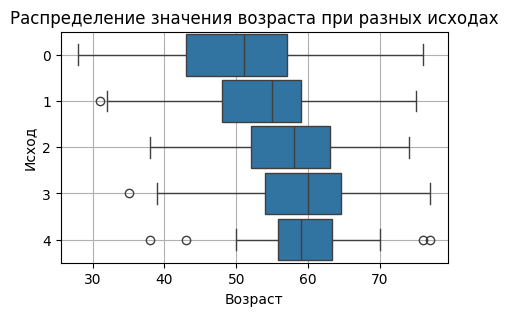

In [17]:
# Показать с помощью графика "ящик с усами" распределение возраста в группе num с разными исходами
fig = plt.figure(figsize=(5, 3))
boxplot = sns.boxplot(
    data=data,
    y='num',
    x='age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение значения возраста при разных исходах');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Исход');
boxplot.grid()
# Ка видно из графика, пациенты были старше c увеличением исхода. 

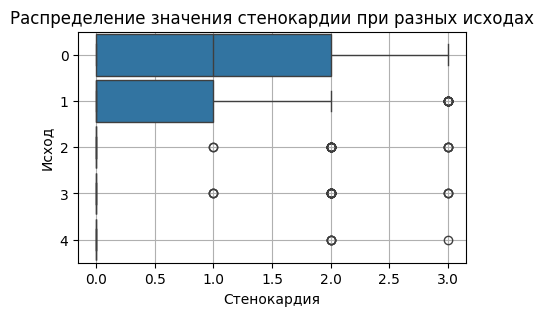

In [36]:
# Показать с помощью графика "ящик с усами" распределение возраста в группе num с разными исходами
fig = plt.figure(figsize=(5, 3))
boxplot = sns.boxplot(
    data=data,
    y='num',
    x='cp',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение значения стенокардии при разных исходах');
boxplot.set_xlabel('Стенокардия');
boxplot.set_ylabel('Исход');
boxplot.grid()
# Ка видно из графика, пациенты были старше c увеличением исхода. 

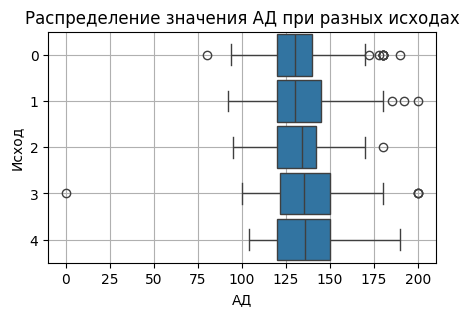

In [35]:
# Показать с помощью графика "ящик с усами" распределение возраста в группе num с разными исходами
fig = plt.figure(figsize=(5, 3))
boxplot = sns.boxplot(
    data=data,
    y='num',
    x='trestbps',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение значения АД при разных исходах');
boxplot.set_xlabel('АД');
boxplot.set_ylabel('Исход');
boxplot.grid()

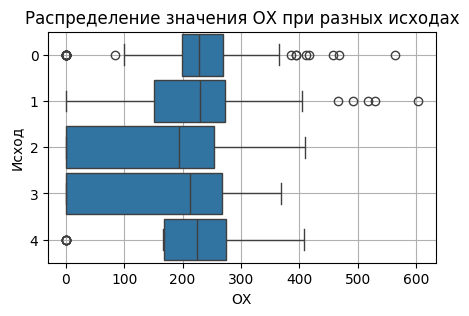

In [34]:
# Показать с помощью графика "ящик с усами" распределение возраста в группе num с разными исходами
fig = plt.figure(figsize=(5, 3))
boxplot = sns.boxplot(
    data=data,
    y='num',
    x='chol',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение значения ОХ при разных исходах');
boxplot.set_xlabel('ОХ');
boxplot.set_ylabel('Исход');
boxplot.grid()
# Ка видно из графика, пациенты были старше c увеличением исхода. 

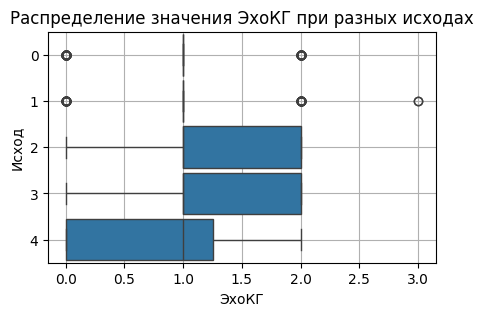

In [33]:
# Показать с помощью графика "ящик с усами" распределение возраста в группе num с разными исходами
fig = plt.figure(figsize=(5, 3))
boxplot = sns.boxplot(
    data=data,
    y='num',
    x='restecg',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение значения ЭхоКГ при разных исходах');
boxplot.set_xlabel('ЭхоКГ');
boxplot.set_ylabel('Исход');
boxplot.grid()

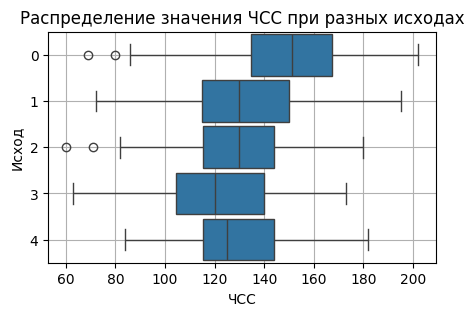

In [37]:
# Показать с помощью графика "ящик с усами" распределение возраста в группе num с разными исходами
fig = plt.figure(figsize=(5, 3))
boxplot = sns.boxplot(
    data=data,
    y='num',
    x='thalch',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение значения ЧСС при разных исходах');
boxplot.set_xlabel('ЧСС');
boxplot.set_ylabel('Исход');
boxplot.grid()

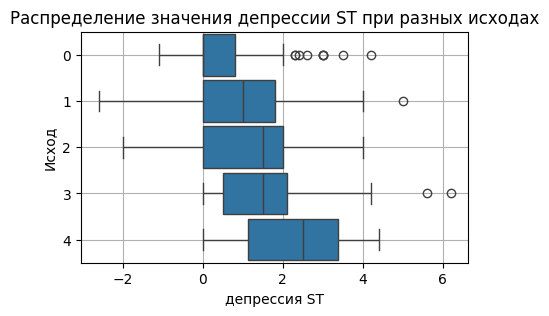

In [38]:
# Показать с помощью графика "ящик с усами" распределение возраста в группе num с разными исходами
fig = plt.figure(figsize=(5, 3))
boxplot = sns.boxplot(
    data=data,
    y='num',
    x='oldpeak',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение значения депрессии ST при разных исходах');
boxplot.set_xlabel('депрессия ST');
boxplot.set_ylabel('Исход');
boxplot.grid()

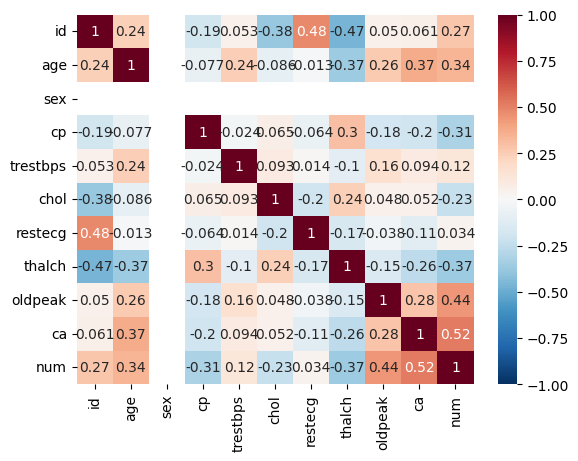

In [40]:
# Графическое отображение корреляционных взаимосвязей
sns.heatmap(
    data.corr(numeric_only=True),
    cmap='RdBu_r',
    annot=True,
    vmin=-1, vmax=1
    );
#  Мы можем оценить корреляционные взаимосвязи

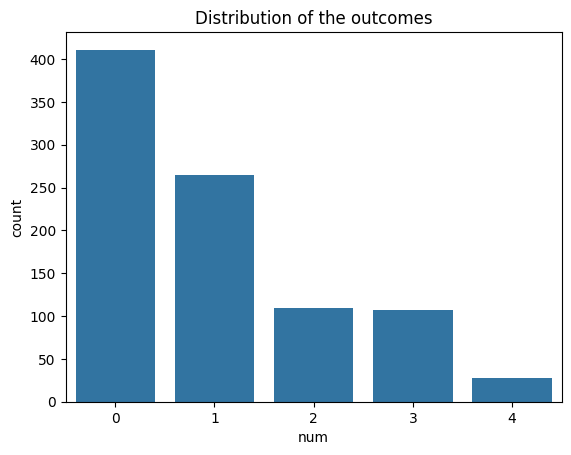

In [41]:
sns.countplot(x = 'num', data =data)
plt.title('Distribution of the outcomes')
plt.show()

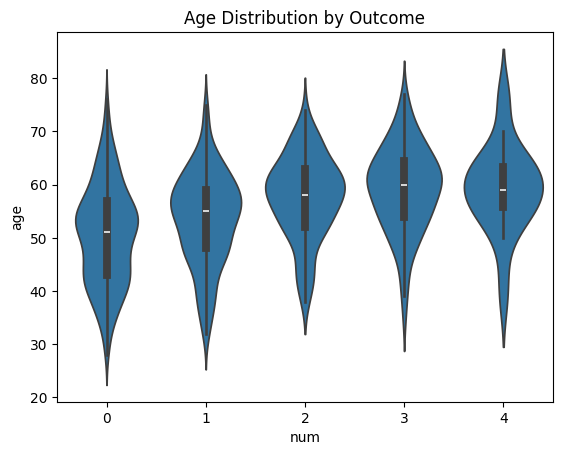

In [42]:
sns.violinplot(x='num', y='age', data=data)
plt.title('Age Distribution by Outcome')
plt.show()

In [49]:
X = data.drop('num', axis=1) 
y = data['num'] 

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

In [ ]:
new_df = pd.DataFrame(X_oversampled, columns=X.columns)
new_df['Outcome'] = y_oversampled
new_df['Outcome'].value_counts()

In [45]:
new_data = pd.DataFrame(X, columns=X.columns)
new_data['num'] = y
new_data['num'].value_counts()

NameError: name 'X' is not defined

In [43]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(X_oversampled)
x_transform = pre_process.fit_transform(X_oversampled)

NameError: name 'X_oversampled' is not defined